## Caso Crédito a Plazos

##### Predecir el incumplimiento al momento de la solicitud del crédito a plazos mediante el análisis de la Data de 2052 clientes para la toma de decisión de aprobación o negación de las solicitudes de crédito

In [1]:
##Importación de librerias

import numpy as np               #Matemática
import pandas as pd              #Tablas o DataFrames
import scipy.stats as sc 
import matplotlib                #Calculos estadisticos
import matplotlib.pyplot as plt  #Graficos
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont

Leemos el archivo .txt y lo cargamos como un dataset de Pandas. Y vemos su tamaño

In [3]:
df=pd.read_csv("E:/BDA_VIII/Trabajo/CasoUso.csv", delimiter=",")
df.head(10)                #Nos mustra las 5 primeras clumnas para darnos una idea de la clase de datos a trabajar

,MES,ID,SCORE_SISTEMA,CTDMESPASIVOULT12MES,INGRESO,CLASIFRIESGO_6,ESTADOCIVIL,TIPO,DEPARTAMENTO,NUMEROHIJOS,INCUMPLIMIENTOEN12,DELTA_BANCOS
0,201510,1,258.010479,12.0,3248.99,0,SOL,1,8,0,0,3
1,201510,2,398.528706,12.0,4907.58,0,CAS,1,28,0,0,3
2,201510,3,343.122435,12.0,3537.13,0,SOL,1,30,0,0,3
3,201510,4,333.899411,10.0,4035.68,0,SOL,1,24,2,0,3
4,201510,5,418.165619,12.0,4583.21,0,CAS,1,8,0,0,3
5,201510,6,260.432819,12.0,3152.11,1,SOL,1,30,2,0,3
6,201510,7,316.497673,11.0,3889.06,0,SOL,1,48,-,0,3
7,201510,8,329.136778,12.0,3276.52,0,CAS,1,30,0,0,3
8,201510,9,378.112488,12.0,3884.79,0,CAS,1,38,0,0,3
9,201510,10,NaN,12.0,3404.11,0,SOL,1,36,2,0,3


In [4]:
 #veamos cuantas dimensiones y registros contiene
df.shape     

(2052, 12)

In [5]:
df.columns.values   #Nos identifica las columnas

array(['MES', 'ID', 'SCORE_SISTEMA', 'CTDMESPASIVOULT12MES', 'INGRESO',
       'CLASIFRIESGO_6', 'ESTADOCIVIL', 'TIPO', 'DEPARTAMENTO',
       'NUMEROHIJOS', 'INCUMPLIMIENTOEN12', 'DELTA_BANCOS'], dtype=object)

Dado que en la variable mes solo contamos con data del 2015-10, dato que no influye en el tratamiento de data la separamos al igual que ID.

In [6]:
# Separa campos no necesarios

df1=df [['SCORE_SISTEMA', 'CTDMESPASIVOULT12MES', 'INGRESO',
       'CLASIFRIESGO_6', 'ESTADOCIVIL', 'DEPARTAMENTO',
       'NUMEROHIJOS', 'INCUMPLIMIENTOEN12']
 ]

In [7]:
df1.head()

,SCORE_SISTEMA,CTDMESPASIVOULT12MES,INGRESO,CLASIFRIESGO_6,ESTADOCIVIL,DEPARTAMENTO,NUMEROHIJOS,INCUMPLIMIENTOEN12
0,258.010479,12.0,3248.99,0,SOL,8,0,0
1,398.528706,12.0,4907.58,0,CAS,28,0,0
2,343.122435,12.0,3537.13,0,SOL,30,0,0
3,333.899411,10.0,4035.68,0,SOL,24,2,0
4,418.165619,12.0,4583.21,0,CAS,8,0,0


In [8]:
df1.info()    #Muestra la clase de variable de las columnas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2052 entries, 0 to 2051
Data columns (total 8 columns):
SCORE_SISTEMA           1885 non-null float64
CTDMESPASIVOULT12MES    2051 non-null float64
INGRESO                 2052 non-null float64
CLASIFRIESGO_6          2052 non-null int64
ESTADOCIVIL             2052 non-null object
DEPARTAMENTO            2052 non-null int64
NUMEROHIJOS             2045 non-null object
INCUMPLIMIENTOEN12      2052 non-null int64
dtypes: float64(3), int64(3), object(2)
memory usage: 128.3+ KB


Visualizamos que en las variables SCORE_SISTEMA, CTDMESPASIVOULT12MES y NUMEROHIJOS hay variables nulas, por lo que procedemos a reemplazar valores:

In [9]:
df1["NUMEROHIJOS"][df1["NUMEROHIJOS"]=='-']=df1["NUMEROHIJOS"][df1["NUMEROHIJOS"]=='-'].replace('-','0')
df1["NUMEROHIJOS"]=df1["NUMEROHIJOS"].fillna(value=0)
df1["SCORE_SISTEMA"]=df1["SCORE_SISTEMA"].fillna(value=df1["SCORE_SISTEMA"].mean())

In [10]:
df1["CTDMESPASIVOULT12MES"].mode()

0    12.0
dtype: float64

In [11]:
df1["CTDMESPASIVOULT12MES"]=df1["CTDMESPASIVOULT12MES"].fillna(value=12)

In [12]:
df1.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2052 entries, 0 to 2051
Data columns (total 8 columns):
SCORE_SISTEMA           2052 non-null float64
CTDMESPASIVOULT12MES    2052 non-null float64
INGRESO                 2052 non-null float64
CLASIFRIESGO_6          2052 non-null int64
ESTADOCIVIL             2052 non-null object
DEPARTAMENTO            2052 non-null int64
NUMEROHIJOS             2052 non-null object
INCUMPLIMIENTOEN12      2052 non-null int64
dtypes: float64(3), int64(3), object(2)
memory usage: 128.3+ KB


Al visualizar la infrmación de nuestro DataFrame vems que las columnas se unificaron y ya no existen valores Missing para poder tratar nuestra data.

Procedemos a cambiara las columnas con datos categoricos a ese tipo.


In [13]:
df1.DEPARTAMENTO=df1.DEPARTAMENTO.astype('category')
df1.CLASIFRIESGO_6 =df1.CLASIFRIESGO_6 .astype('category')
df1.CTDMESPASIVOULT12MES =df1.CTDMESPASIVOULT12MES .astype('category')
df1.ESTADOCIVIL =df1.ESTADOCIVIL .astype('category')
df1.INCUMPLIMIENTOEN12 =df1.INCUMPLIMIENTOEN12 .astype('category')
df1.NUMEROHIJOS=df1.NUMEROHIJOS.astype('category')

In [14]:
df1.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2052 entries, 0 to 2051
Data columns (total 8 columns):
SCORE_SISTEMA           2052 non-null float64
CTDMESPASIVOULT12MES    2052 non-null category
INGRESO                 2052 non-null float64
CLASIFRIESGO_6          2052 non-null category
ESTADOCIVIL             2052 non-null category
DEPARTAMENTO            2052 non-null category
NUMEROHIJOS             2052 non-null category
INCUMPLIMIENTOEN12      2052 non-null category
dtypes: category(6), float64(2)
memory usage: 46.6 KB


In [15]:
df1.describe()

,SCORE_SISTEMA,INGRESO
count,2052.000000,2052.000000
mean,351.201692,3899.648314
std,56.863741,569.125014
min,178.563464,3000.000000
25%,312.387640,3406.402500
50%,351.201692,3859.940000
75%,395.087154,4344.942500
max,485.040819,4999.990000


In [16]:
df1.describe(include=['category'])

,CTDMESPASIVOULT12MES,CLASIFRIESGO_6,ESTADOCIVIL,DEPARTAMENTO,NUMEROHIJOS,INCUMPLIMIENTOEN12
count,2052.0,2052,2052,2052,2052,2052
unique,13.0,5,6,25,9,2
top,12.0,0,SOL,30,0,0
freq,1914.0,1852,1307,877,1195,1922


Ahora conocemos como esta dividido nuestro TARGET

In [17]:
df1['INCUMPLIMIENTOEN12'].value_counts()

0    1922
1     130
Name: INCUMPLIMIENTOEN12, dtype: int64

1922 de 2052 son leales; su valor de INCUMPLIMIENTO EN 12 MESES es 0. 

Para calcular fracciones, pase normalize = True a la función value_counts.

In [18]:
df1['INCUMPLIMIENTOEN12'].value_counts(normalize=True)

0    0.936647
1    0.063353
Name: INCUMPLIMIENTOEN12, dtype: float64

El 6.3% es la Tasa de deserción, y puede tener un impacto negativo para la empresa.

In [19]:
df1[df1['INCUMPLIMIENTOEN12'] == 1].max()

SCORE_SISTEMA           439.742
CTDMESPASIVOULT12MES         12
INGRESO                    4995
CLASIFRIESGO_6                4
ESTADOCIVIL                 SOL
DEPARTAMENTO                 50
NUMEROHIJOS                   4
INCUMPLIMIENTOEN12            1
dtype: object

In [20]:
df1[df1['INCUMPLIMIENTOEN12'] == 1].min()

SCORE_SISTEMA           193.019
CTDMESPASIVOULT12MES          5
INGRESO                 3023.79
CLASIFRIESGO_6                0
ESTADOCIVIL                 CAS
DEPARTAMENTO                  2
NUMEROHIJOS                   0
INCUMPLIMIENTOEN12            1
dtype: object

In [21]:
df1[df1['INCUMPLIMIENTOEN12'] == 1].mean()

SCORE_SISTEMA            3.168050e+02
CTDMESPASIVOULT12MES     1.159231e+01
INGRESO                  3.955407e+03
CLASIFRIESGO_6           2.615385e-01
DEPARTAMENTO             2.370769e+01
NUMEROHIJOS             8.476923e+121
INCUMPLIMIENTOEN12       1.000000e+00
dtype: float64

In [22]:
df1[df1['INCUMPLIMIENTOEN12'] == 0].mean()

SCORE_SISTEMA            353.528211
CTDMESPASIVOULT12MES      11.736212
INGRESO                 3895.876894
CLASIFRIESGO_6             0.154006
DEPARTAMENTO              24.678460
INCUMPLIMIENTOEN12         0.000000
dtype: float64

## Analisis Univariado

In [23]:
v=pd.DataFrame({"variable": df1.columns.values})
t=pd.DataFrame({"tipo": df1.dtypes.values})
meta = pd.concat([v, t], axis=1)

##### Generación de gráficos

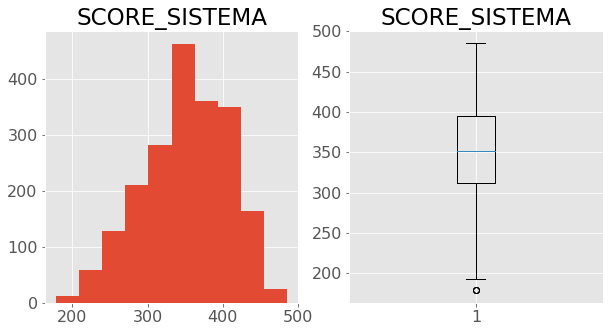

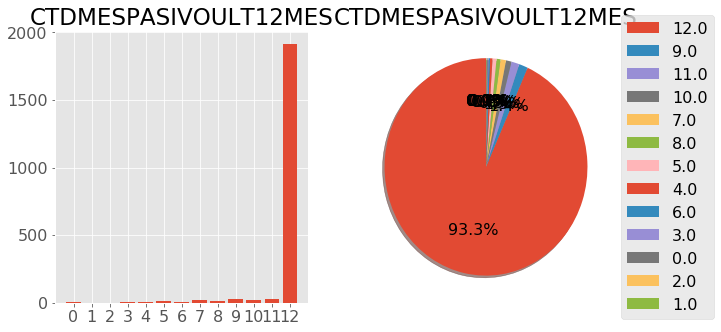

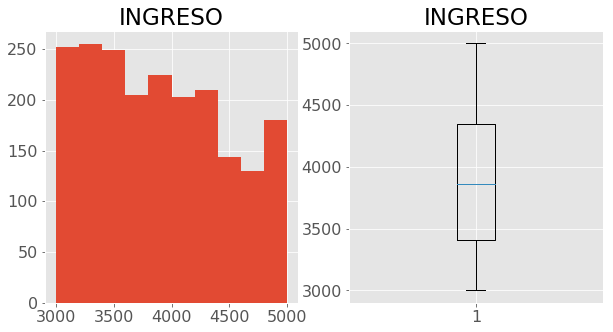

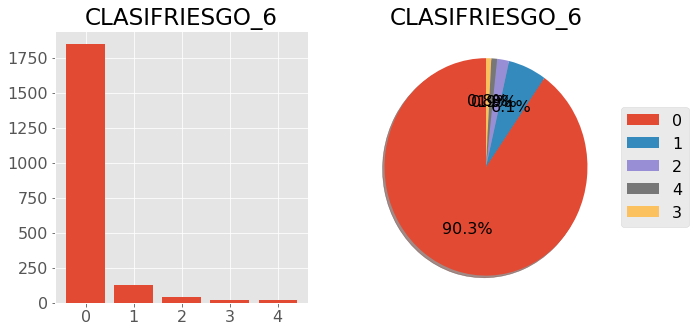

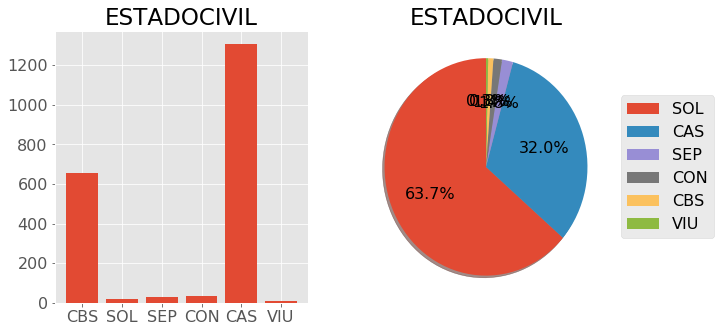

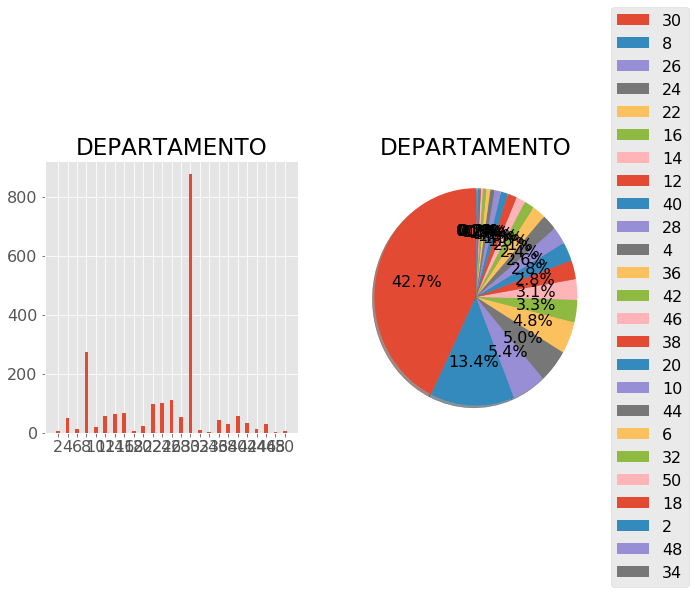

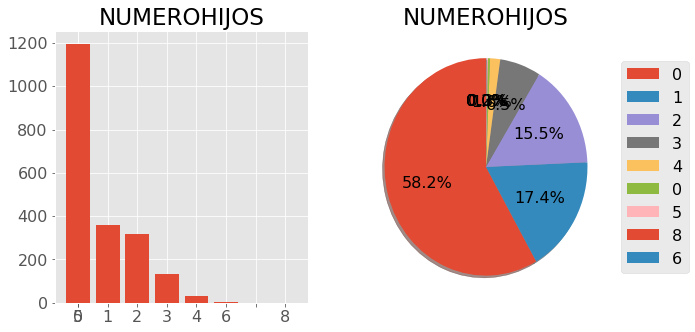

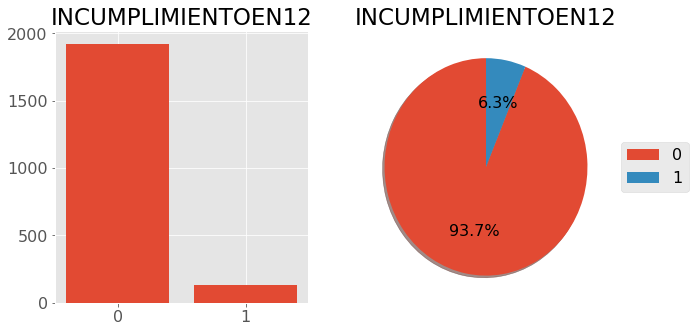

In [24]:
matplotlib.rcParams.update({'font.size': 16})
for i in range(len(meta)) :
    plt.figure(figsize=(10,5))
    v=meta.iloc[i].variable #print(meta.iloc[i].variable)
    t=meta.iloc[i].tipo
    if (t.__class__.__name__=="CategoricalDtype"):
        fa=df1[v].value_counts() 
        fr=fa/len(df1[v]) 
        #Barras
        plt.subplot(1,2,1)
        plt.bar(fa.index,fa)
        plt.xticks(fa.index)
        plt.title(v)
        #Pie
        plt.subplot(1,2,2)
        plt.pie(fr,autopct='%1.1f%%', shadow=True, startangle=90)
        plt.legend(fr.index,loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))
        plt.title(v)
        #Guardar
        plt.savefig("Univariado/"+ v + ".jpg")
    else:
        #Histograma
        plt.subplot(1,2,1)
        plt.hist(df1[v])
        plt.title(v)
        #Boxplot
        plt.subplot(1,2,2)
        plt.boxplot(df1[v])
        plt.title(v)
        #Guardar
        plt.savefig("Univariado/"+ v + ".jpg")
    plt.show()

##### Generación de indicadores

In [25]:
import scipy.stats as sc 

for i in range(len(meta)) :
    v=meta.iloc[i].variable 
    t=meta.iloc[i].tipo
    if (t.__class__.__name__=="CategoricalDtype"):
        x=pd.DataFrame({"var":v,"mean": ".",
                        "median": ".",
                        "mode": ".",
                        "min": ".",
                        "max": ".",
                        "sd": ".",
                        "cv": ".",
                        "k": ".",
                        "Q1": ".",
                        "Q3": ".",
                        "Nmiss": "."
                        },index=[i])
    else:
        P25=np.percentile(df1[v],q=25)
        P75=np.percentile(df1[v],q=75)
        IQR=P75-P25
        liV=P25-1.5*IQR # Mimimo Viable
        lsV=P75+1.5*IQR # Maximo Viable
        x=pd.DataFrame({"var":v,"mean": df1[v].mean(),
                        "median": df1[v].median(),
                        "mode": df1[v].mode(),
                        "min": df1[v].min(),
                        "max": df1[v].max(),
                        "sd": df1[v].std(),
                        "cv": df1[v].std()/df1[v].mean(),
                        "k": sc.kurtosis(df1[v]),
                        "Q1": np.percentile(df1[v],q=25),
                        "Q3": np.percentile(df1[v],q=75),
                        "Nmiss": df1[v].isnull().sum()/len(df1)
                        }, index=[i])
    if(i==0):
        x1=x
    else:
       x1=pd.concat([x1, x])  # x1.append(x)
    print(i)


0
1
2
3
4
5
6
7


Por las gráficas Univariados vemos variables con muchos Outlider:
    
    CTDMESPASIVOULT12MES : Cantidad de meses que tuvo saldo en cuentas de ahorro en el último año.
    CLASIFRIESGO_6       : Clasificación en el sistema financiero en los últimos 6 meses(0 es la mejor y 4 la peor)
    

## Analisis Bivariado

##### Generación de gráficos

SCORE_SISTEMA


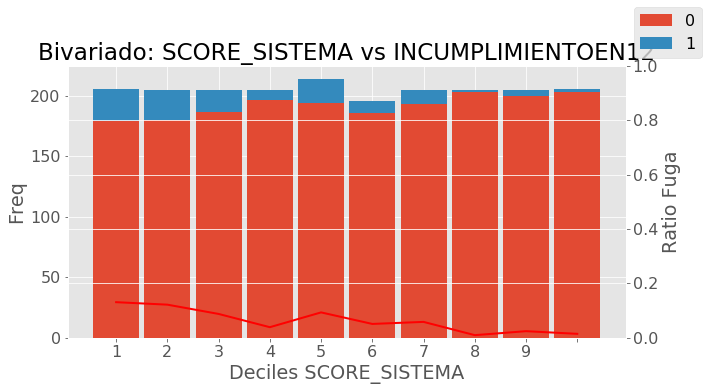

CTDMESPASIVOULT12MES


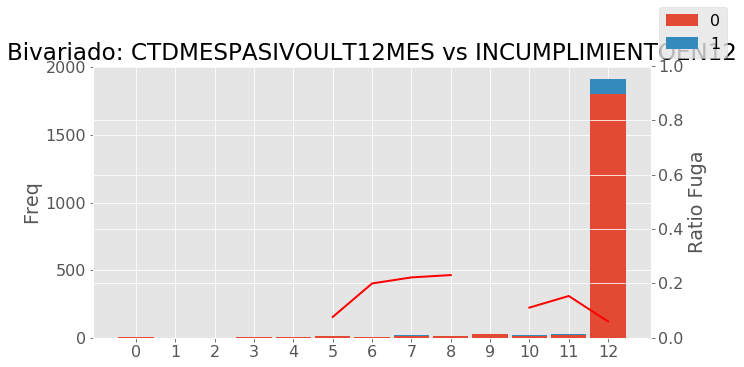

INGRESO


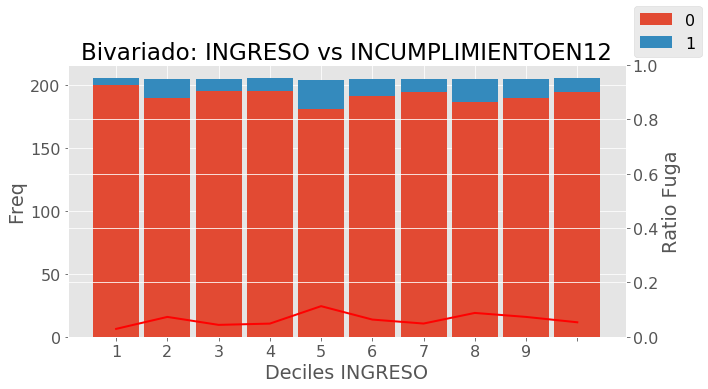

CLASIFRIESGO_6


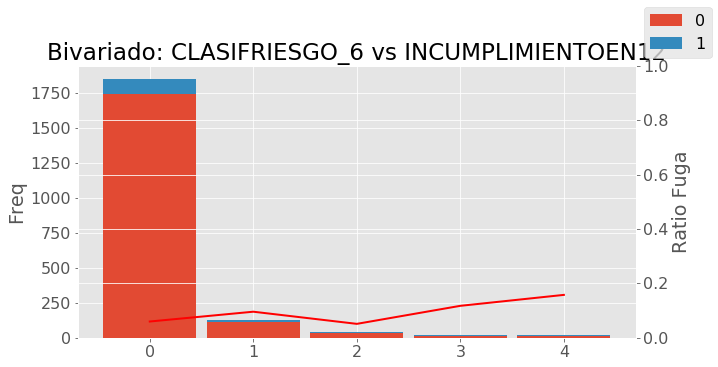

ESTADOCIVIL


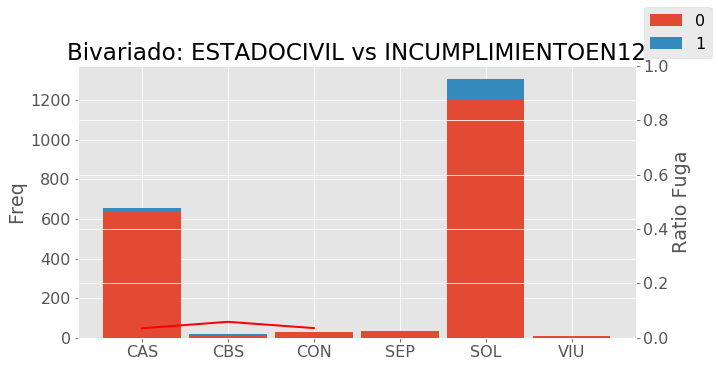

DEPARTAMENTO


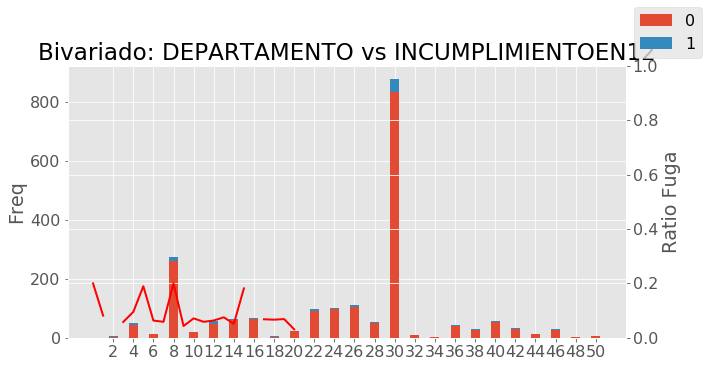

NUMEROHIJOS


TypeError: unsupported operand type(s) for -: 'str' and 'float'

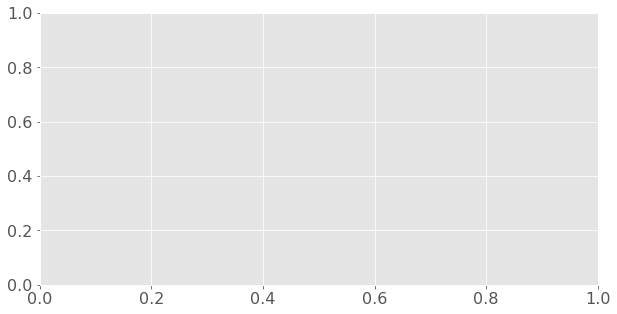

In [26]:
df1.dtypes
v=pd.DataFrame({"variable": df1.columns.values})
t=pd.DataFrame({"tipo": df1.dtypes.values})
meta = pd.concat([v, t], axis=1)
#target:
y="INCUMPLIMIENTOEN12"
matplotlib.rcParams.update({'font.size': 16})
for i in range(len(meta)) :
    plt.figure(figsize=(10,5))
    v=meta.iloc[i].variable #print(meta.iloc[i].variable)
    t=meta.iloc[i].tipo
    if v==y: break
    print(v)
    if (t.__class__.__name__=="CategoricalDtype"):        
        g=df1.groupby([df1[y],v]).size().unstack(0)
        tf= g[1]/(g[0]+g[1])
        c1 = g[0]
        c2 = g[1]
        width = 0.9       # the width of the bars: can also be len(x) sequence
        
        p1 = plt.bar(g.index, c1, width)
        p2 = plt.bar(g.index, c2, width,
                     bottom=c1)
        
        plt.ylabel('Freq')
        plt.title('Bivariado: ' + v + " vs " + y)
        plt.xticks(g.index)
        plt.legend((p1[0], p2[0]), ('0', '1'),loc='lower left',bbox_to_anchor=(1, 1))
        
        plt.twinx().plot(tf.values,linestyle='-', linewidth=2.0,color='red')
        plt.ylabel('Ratio Fuga')
        plt.ylim(0,1)
        #Guardar
        plt.savefig("Bivariado/"+ v + ".jpg")
    else:
        d=pd.qcut(df1[v], 10, duplicates='drop',labels=False)     
        g=df1.groupby([y, d]).size().unstack(0)   
        N = len(g)
        menMeans = g[0]
        womenMeans = g[1]
        tf= g[1]/(g[0]+g[1])
        ind = np.arange(N)    # the x locations for the groups

        width = 0.9       # the width of the bars: can also be len(x) sequence        
        p1 = plt.bar(ind, menMeans, width)
        p2 = plt.bar(ind, womenMeans, width,
                     bottom=menMeans)
        
        plt.ylabel('Freq')
        plt.xlabel("Deciles " + v)
        plt.title('Bivariado: ' + v + " vs " + y)
        plt.xticks(ind, np.arange(1,10,1))
        plt.legend((p1[0], p2[0]), ('0', '1'),loc='lower left',bbox_to_anchor=(1, 1))
        
        plt.twinx().plot(tf.values,linestyle='-', linewidth=2.0,color='red')
        plt.ylabel('Ratio Fuga')
        plt.ylim(0,1)
        #Guardar
        plt.savefig("Bivariado/"+ v + ".jpg")
    plt.show()


## MODELO ÁRBOLES DE DECISIÓN
Trabajaremos con el modelo de arboles porque nos permite predecir y clasificar una variable objetivo independiente a través de la combinación de variables independientes.
Es un algoritmo de aprendizaje autómatico, que nos ayuda a explorarar los datos, el reconocimiento de patrones de importancia y tendencia del riesgo de nuestro objetivo.

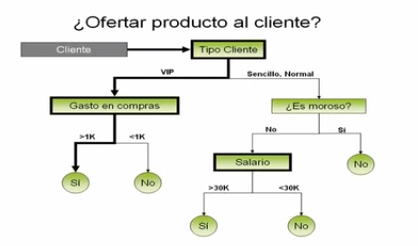

In [28]:
### data final, quitamos los casos
ds = df1[(df1['ESTADOCIVIL'] != 'SEP') & (df1['ESTADOCIVIL'] != 'VIU')]
ds=ds[ds["CTDMESPASIVOULT12MES"]!=9]
ds["CTDMESPASIVOULT12MES"]=df1["CTDMESPASIVOULT12MES"].fillna(value=12) 
ds.to_csv("ds.csv", index=False)

In [29]:
dfinal=pd.read_csv("E:/BDA_VIII/Trabajo/ds.csv", delimiter=",")
dfinal['ESTADOCIVIL'] = dfinal['ESTADOCIVIL'].map( {'SOL': 1, 'CAS': 2, 'CON': 3, 'CBS': 4, '': 0} ).astype(int)
dfinal.head() 

,SCORE_SISTEMA,CTDMESPASIVOULT12MES,INGRESO,CLASIFRIESGO_6,ESTADOCIVIL,DEPARTAMENTO,NUMEROHIJOS,INCUMPLIMIENTOEN12
0,258.010479,12.0,3248.99,0,1,8,0,0
1,398.528706,12.0,4907.58,0,2,28,0,0
2,343.122435,12.0,3537.13,0,1,30,0,0
3,333.899411,10.0,4035.68,0,1,24,2,0
4,418.165619,12.0,4583.21,0,2,8,0,0


In [30]:
dfinal["CTDMESPASIVOULT12MES"].value_counts()

12.0    1875
11.0      24
7.0       18
10.0      18
8.0       13
5.0       13
4.0        8
6.0        4
0.0        3
3.0        2
1.0        1
2.0        1
Name: CTDMESPASIVOULT12MES, dtype: int64

In [31]:
X=dfinal.iloc[:,:-1].values
y=dfinal.iloc[:,7].values
dfinal.columns
xxxx=pd.DataFrame(X)
data_feature_names=['SCORE_SISTEMA', 'CTDMESPASIVOULT12MES', 'INGRESO', 'CLASIFRIESGO_6',
       'ESTADOCIVIL', 'DEPARTAMENTO', 'NUMEROHIJOS']

In [32]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.25, random_state=0)


from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion="entropy", random_state=0)
classifier.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [33]:
# Acerca del modelo (Metricas)
classifier.get_params()

{'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': 0,
 'splitter': 'best'}

SCORE_SISTEMA	:	37.5961566311
CTDMESPASIVOULT12MES	:	2.15204140102
INGRESO	:	39.1262777721
CLASIFRIESGO_6	:	1.70904536513
ESTADOCIVIL	:	2.6645882913
DEPARTAMENTO	:	9.49138166587
NUMEROHIJOS	:	7.26050887348


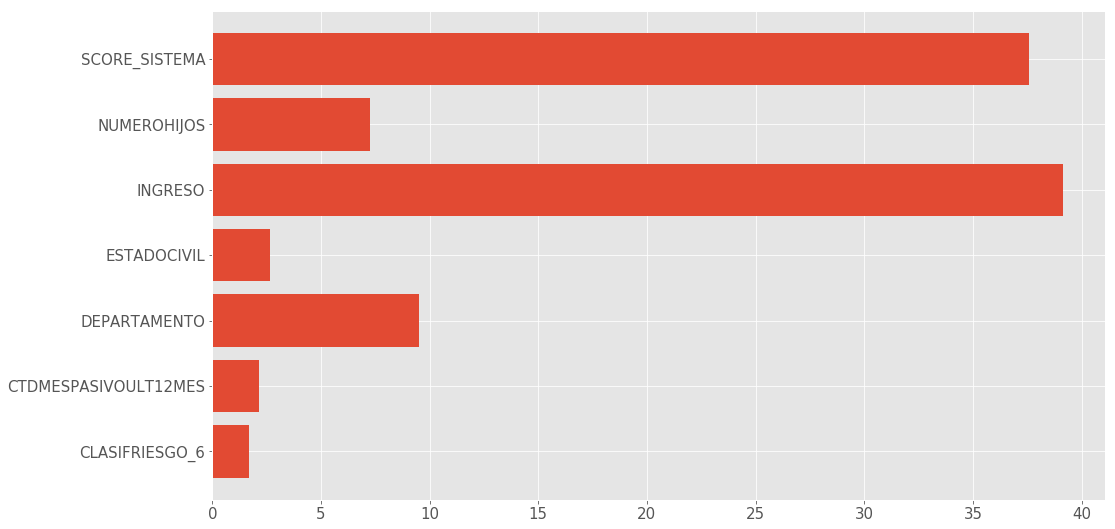

In [34]:
# A. Importancia de las Variables
importance=classifier.feature_importances_
#importance=np.sort(importance)
matplotlib.rcParams.update({'font.size':15})
plt.barh(data_feature_names,importance*100)

for i in range(0,len(importance)) : 
    print(str(data_feature_names[i])+"\t:\t"+ str(importance[i]*100))

In [35]:
# B. Validacion del Modelo (Matriz de Confusion): 
#   Variable de Interes es la Fuga (Exied=1)
y_pred=classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score,roc_auc_score
cm=confusion_matrix(y_test,y_pred) 
cm
# TP | FP
# FN | TN

array([[427,  40],
       [ 23,   5]], dtype=int64)

In [36]:
# lo observado en test VS lo predicho con X_test
Exito=accuracy_score(y_test,y_pred)  #(427+5)/495  :0.87
Exito

0.87272727272727268

In [37]:
Fracaso=1-Exito # El modelo asierta en el 87% de los casos
Fracaso

0.12727272727272732

In [38]:
#Sesibilidad=TP(TP+FN)   # 0.9488888888888889 solo le esto acertando al 95% de los que me interesa
Sesibilidad=427/(427+23) 
Sesibilidad

0.9488888888888889

In [39]:
#Epecificidad=TN/(TN+FP)   # 0.1111111111111111 estamos clasificando al 11% sin el valor de interes
Epecificidad=5/(5+40) 
Epecificidad

0.1111111111111111

In [40]:
ROC=roc_auc_score(y_test,y_pred) # 0.54645916182318754 : Cercano a 1 es mucho mejor
ROC

0.54645916182318754

In [41]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred) )

             precision    recall  f1-score   support

          0       0.95      0.91      0.93       467
          1       0.11      0.18      0.14        28

avg / total       0.90      0.87      0.89       495



In [42]:
# C. Validar el Sobre ajuste (overfitting) : sobre entrenado y no preparado para nuevos casos
y_pred_train=classifier.predict(X_train)    
Exito_overfitting=accuracy_score(y_train,y_pred_train) # 1.0 : el modelo esta 100% entrenado para el train
Exito_overfitting

0.99932659932659929

In [43]:
#==============================================
# 3. MULTIPLES ENTRENAMIENTOS
#==============================================
    # A. Varios entrenamientos 
train_pred=[]
test_pred=[]
max_deep_list=list(range(3,30)) # numero de los niveles posibles a probar
max_deep_list

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

for deep in max_deep_list:
    arbol=DecisionTreeClassifier(criterion="entropy", max_depth=deep,random_state=0)
    arbol.fit(X_train,y_train)
    train_pred.append(arbol.score(X_train,y_train)) # con el X_train saca un y_pred_train
    test_pred.append(arbol.score(X_test,y_test))# con el X_test saca un y_pred_test
  

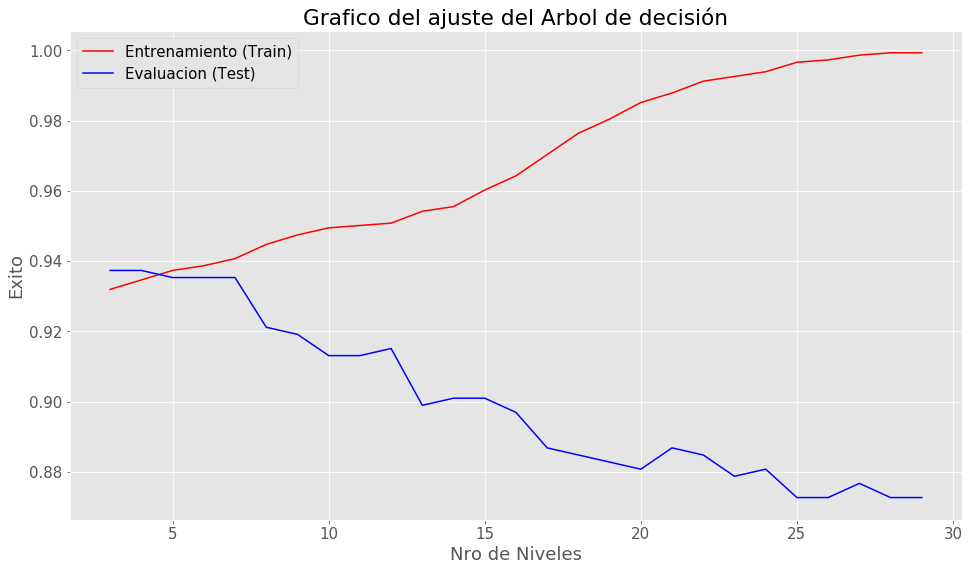

In [44]:
# B. grafica de resultados
plt.plot(max_deep_list,train_pred, color='r', label="Entrenamiento (Train)")
plt.plot(max_deep_list,test_pred, color='b', label="Evaluacion (Test)")
plt.title("Grafico del ajuste del Arbol de decisión")
plt.legend()
plt.ylabel("Exito")
plt.xlabel("Nro de Niveles")
plt.show()

SCORE_SISTEMA	:	50.1984036002
CTDMESPASIVOULT12MES	:	4.03842689041
INGRESO	:	27.0328160565
CLASIFRIESGO_6	:	0.0
ESTADOCIVIL	:	8.35502610419
DEPARTAMENTO	:	3.61375957741
NUMEROHIJOS	:	6.76156777133


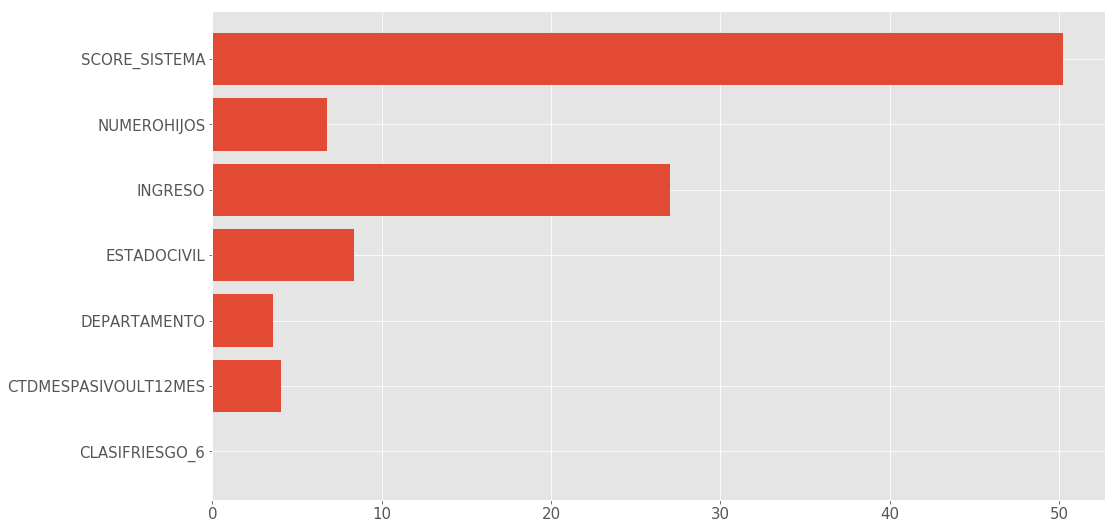

In [45]:
#==============================================
# 4. MODELO FINAL (6 niveles)
#==============================================
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion="entropy", max_depth=5,random_state=0,class_weight="balanced" )
classifier.fit(X_train,y_train)
# Acerca del modelo (Metricas)
classifier.get_params()
    # A. Importancia de las Variables
importance=classifier.feature_importances_
#importance=np.sort(importance)
matplotlib.rcParams.update({'font.size':15})
plt.barh(data_feature_names,importance*100)

for i in range(0,len(importance)) : 
    print(str(data_feature_names[i])+"\t:\t"+ str(importance[i]*100))

    # B. Validacion del Modelo (Matriz de Confusion): 
    #   Variable de Interes es la Fuga (Exied=1)
y_pred=classifier.predict(X_test)

In [47]:
from sklearn.metrics import confusion_matrix, accuracy_score,roc_auc_score
cm=confusion_matrix(y_test,y_pred) # lo observado en test VS lo predicho con X_test
cm

array([[266, 201],
       [  9,  19]], dtype=int64)

In [48]:
Exito=accuracy_score(y_test,y_pred) #58 %
Exito

0.5757575757575758

In [49]:
Fracaso=1-Exito # El modelo asierta en el 42% de los casos
Fracaso

0.4242424242424242

In [50]:
#Sesibilidad=TP(TP+FN)   # 0.569593147751606 solo le esto acertando al 57% de los que me interesa
Sesibilidad=266/(266+201) 
Sesibilidad

0.569593147751606

In [51]:
#Epecificidad=TN/(TN+FP)   # 0.6785714285714286 estamos clasificando al 67% sin el valor de interes
Epecificidad=19/(19+9) 
Epecificidad

0.6785714285714286

In [52]:
ROC=roc_auc_score(y_test,y_pred) # de 55% a 62% : Cercano a 1 es mucho mejor
ROC

0.62408228816151734

In [53]:
# C. Visualizando el arbol online: http://www.webgraphviz.com
from sklearn import tree
tree.export_graphviz(classifier, 
                     feature_names=data_feature_names,
                     out_file="E:/BDA_VIII/Trabajo/tree_PB.dot",
                     filled=True)